In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#NBA APi librarry imports
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [3]:
from nba_api.stats.endpoints.playergamelog import PlayerGameLog

In [4]:
season_stats = LeagueDashPlayerStats(per_mode_detailed='PerGame')

In [5]:
stats_df = season_stats.get_data_frames()[0]

In [6]:
stats_df = stats_df.sort_values(by='AST', ascending=False)

In [7]:
top_5 = stats_df.iloc[0:40]

In [8]:
def assist_each_game_for_player_and_counts(player_id, player_name):
    game_log = PlayerGameLog(player_id=player_id)
    game_log_df = game_log.get_data_frames()[0]
    assist_counts = game_log_df.AST.value_counts()
    counts_for_each = []
    game_log_df.loc[:, 'PLAYER_NAME'] = player_name
    assists = game_log_df.AST.tolist()
    for assist in assists:
        counts_for_each.append(assist_counts.loc[assist])
    return game_log_df

In [ ]:
player_name_ast_dict = dict()
for (player_id, player_name) in zip(top_5.PLAYER_ID.tolist(), top_5.PLAYER_NAME.tolist()):
    player_name_ast_dict[player_name] = assist_each_game_for_player_and_counts(player_id, player_name)
    print(player_name)

Russell Westbrook
Kyle Lowry
John Wall
Ben Simmons
Jrue Holiday
Chris Paul
Jeff Teague
James Harden
Rajon Rondo
Nikola Jokic
Draymond Green
Trae Young
LeBron James
De'Aaron Fox
Kyrie Irving
Devin Booker


In [ ]:
concated_dfs = pd.concat(player_name_ast_dict.values())

In [ ]:
plt.style.use('fivethirtyeight')

In [35]:
def set_background_color(color, ax, fig):
    ax.set_facecolor(color)
    fig.set_facecolor(color)

In [36]:
def title_and_text_colors(title, color, ax):
    plt.title(title, color=color, fontsize=23, x=0.45)
    ax.tick_params(axis='both', colors=color, labelsize=15)
    ax.grid(b=False, axis='x')
    ax.grid(b=True, axis='y', color=color)
    plt.xlabel("Points", color=color, fontsize=17, x=0.45)
    plt.ylabel("")
    plt.text(x=47, y=4.9, s='instagram: kwasiarhin', color=color)
    plt.text(x=2, y=4.9, s='github.com/kwasiarhin', color=color)

NameError: name 'remove_spines' is not defined

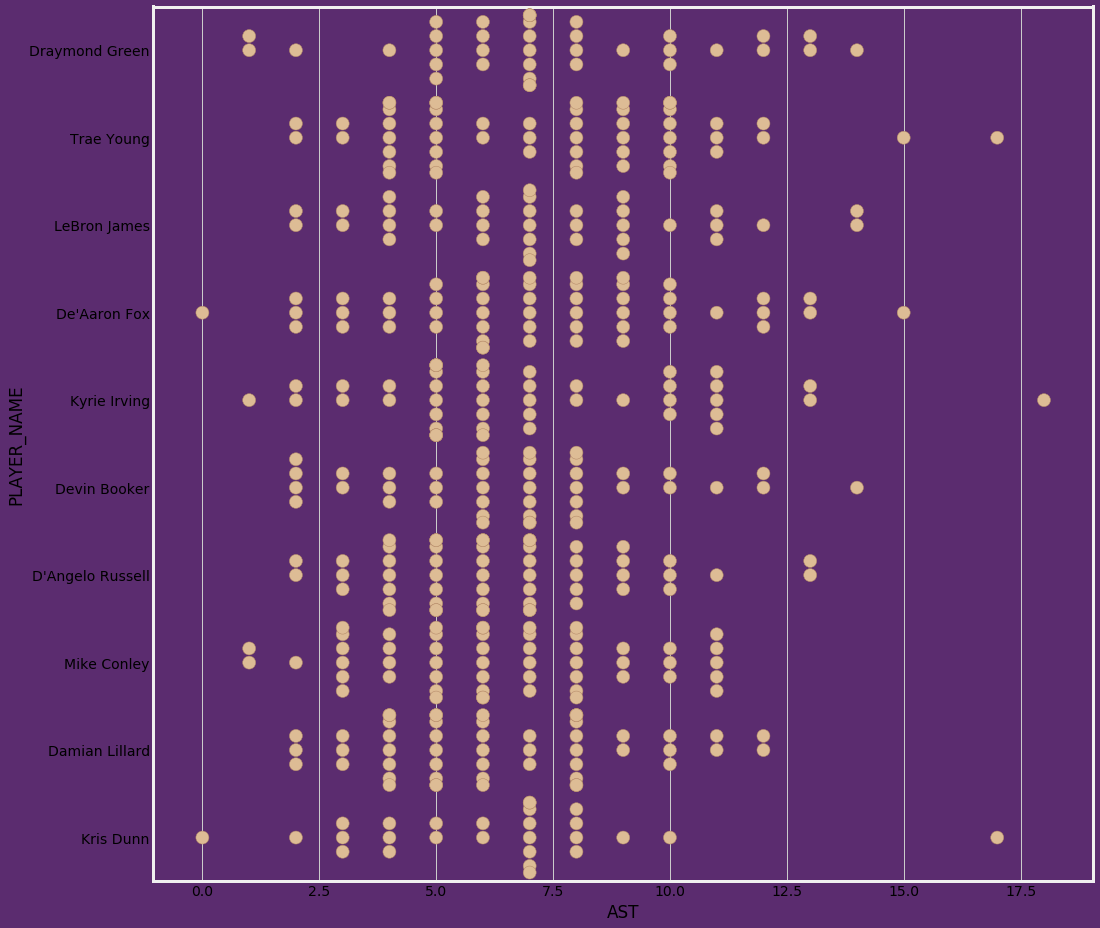

In [41]:
plt.figure(figsize=(15, 15))

sns.swarmplot(
    x="AST",
    y="PLAYER_NAME",
    data=concated_dfs,
    size=13,
    color="#DDBC95",
    edgecolor="#B38867",
    linewidth=0.5
)

ax = plt.gca()
fig = plt.gcf()

set_background_color(color='#5b2c6f', ax=ax, fig=fig)
remove_spines(ax)

title = 'Distribution of points scored in games this season for top 5 scorers'
title_and_text_colors(title, '#CDCDC0', ax)